In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import datetime as dt
from Plotting import Plotting
from scipy.stats import describe,ttest_ind,stats, norm

import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [193]:
df = pd.read_csv("apple_data.csv")

In [5]:
df.head()

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578


In [93]:
df.columns

Index(['volume', 'vwap', 'open', 'close', 'high', 'low', 'time',
       'transactions'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB


In [7]:
df.isnull().sum()

volume          0
vwap            0
open            0
close           0
high            0
low             0
time            0
transactions    0
dtype: int64

In [8]:
df.describe()

,volume,vwap,open,close,high,low,time,transactions
count,4.159000e+03,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4.159000e+03,4.159000e+03
mean,3.662925e+08,46.391382,46.362788,46.396058,46.881127,45.865790,1.428315e+09,2.709318e+05
std,3.724793e+08,50.277557,50.235593,50.293482,50.843874,49.680104,1.505279e+08,2.510859e+05
min,2.422234e+07,2.841000,2.835400,2.792900,2.928600,2.792900,1.167800e+09,3.048700e+04
25%,1.067497e+08,11.936200,11.955700,11.947150,12.028400,11.853600,1.297876e+09,1.128150e+05
50%,2.136463e+08,25.885200,25.775000,25.825000,26.262800,25.680000,1.428466e+09,1.782460e+05
75%,4.965321e+08,52.154150,52.263750,52.231250,52.626250,51.796250,1.558627e+09,3.259555e+05
max,3.373042e+09,193.102000,193.780000,193.970000,194.480000,191.760000,1.689134e+09,2.966979e+06


In [194]:
#converting time date to propper format
df['time'] = pd.to_datetime(df['time'], unit='s')

In [52]:
df.time

0      2007-01-03 05:00:00
1      2007-01-04 05:00:00
2      2007-01-05 05:00:00
3      2007-01-08 05:00:00
4      2007-01-09 05:00:00
               ...        
4154   2023-07-06 04:00:00
4155   2023-07-07 04:00:00
4156   2023-07-10 04:00:00
4157   2023-07-11 04:00:00
4158   2023-07-12 04:00:00
Name: time, Length: 4159, dtype: datetime64[ns]

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   volume        4159 non-null   float64            
 1   vwap          4159 non-null   float64            
 2   open          4159 non-null   float64            
 3   close         4159 non-null   float64            
 4   high          4159 non-null   float64            
 5   low           4159 non-null   float64            
 6   time          4159 non-null   datetime64[ns, UTC]
 7   transactions  4159 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 260.1 KB


In [24]:
plot = Plotting(df)

Available plot options:
1. Violin Plot
2. Histogram
3. Correlation Heatmap
4. Choropleth Map
5. Line Plot
Enter the number of the plot you want to create: 2


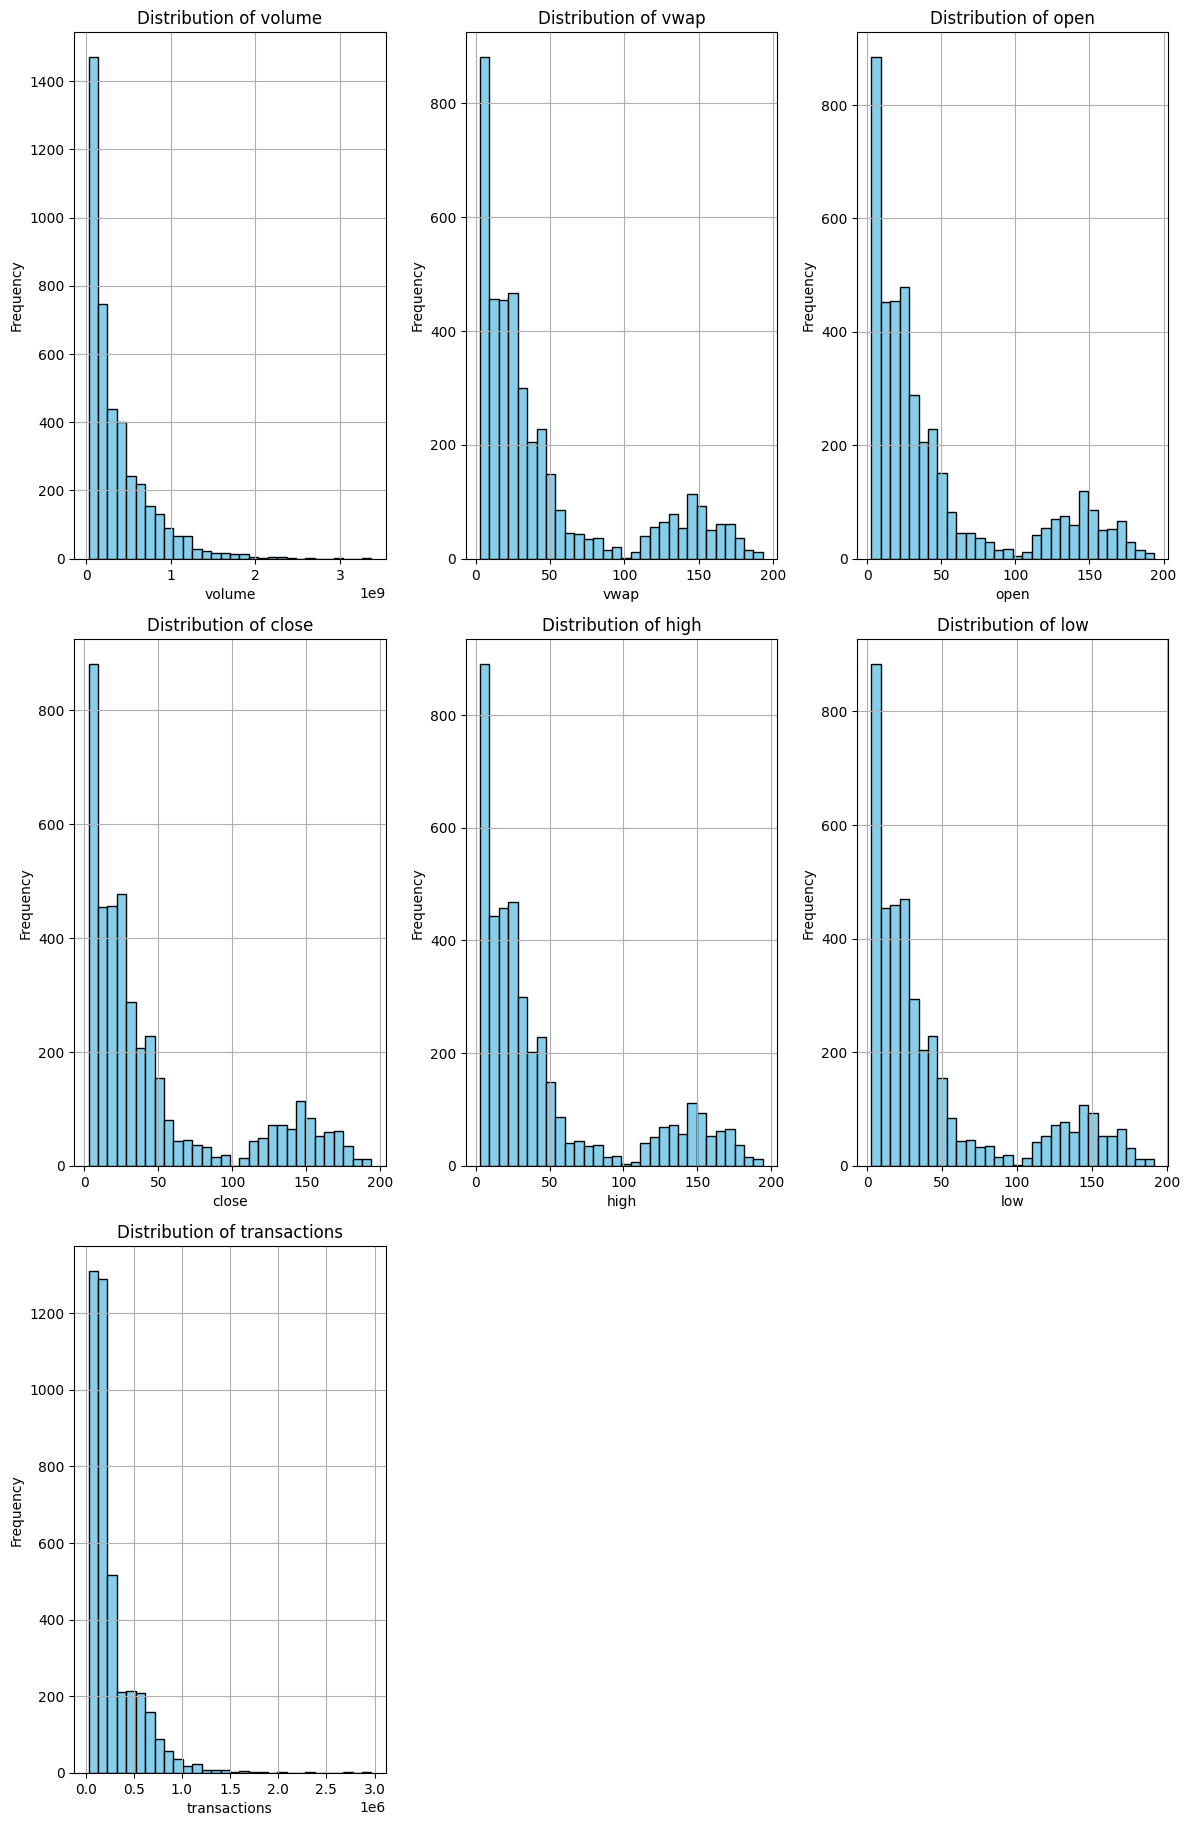

In [26]:
plot.select_plot()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   object 
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 260.1+ KB


In [72]:
df_time = df.groupby(df["time"].dt.year)[["high", "low"]].mean().reset_index() #mean high and low prices

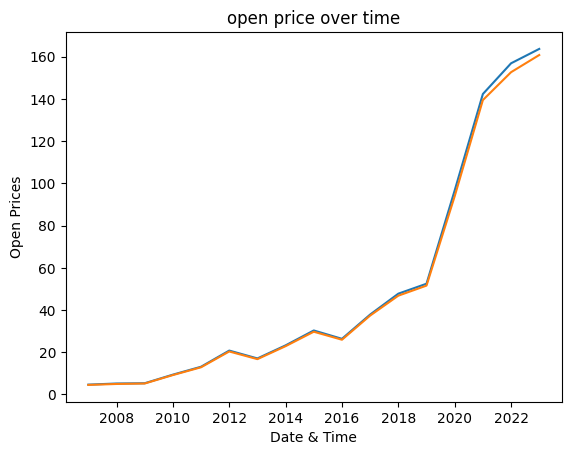

In [71]:
sns.lineplot(x="time", y="high", data = df_time)
sns.lineplot(x="time", y="low", data = df_time)
plt.title("open price over time")
plt.xlabel("Date & Time")
plt.ylabel("Open Prices")
plt.show()

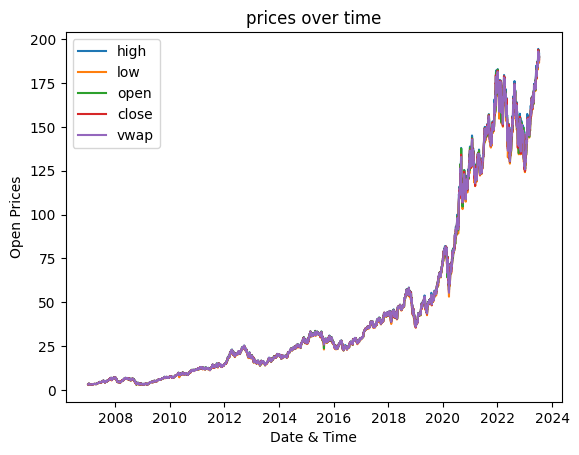

In [82]:
sns.lineplot(x="time", y="high", data = df, label = "high")
sns.lineplot(x="time", y="low", data = df, label = "low")
sns.lineplot(x="time", y="open", data = df, label = "open")
sns.lineplot(x="time", y="close", data = df, label = "close")
sns.lineplot(x="time", y="vwap", data = df, label = "vwap")

plt.title("prices over time")
plt.legend()
plt.xlabel("Date & Time")
plt.ylabel("Open Prices")
plt.show()

In 2019, the Apples financial strategy consisted primarily of repurchasing its own shares, which had the effect of boosting the stock price artificially.

In [73]:
#mean of all the years high and low over the month
df_time = df.groupby(df["time"].dt.month)[["high", "low"]].mean().reset_index()

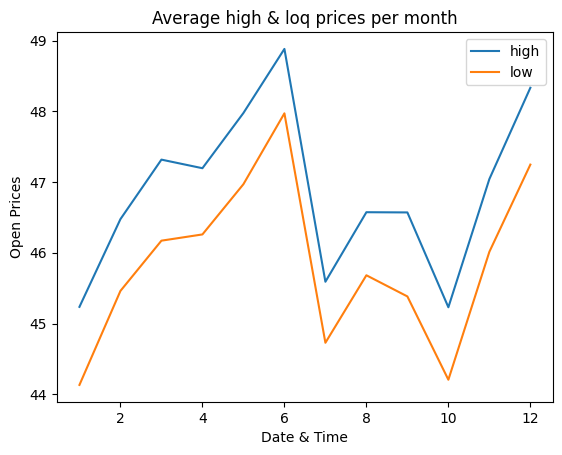

In [78]:
sns.lineplot(x="time", y="high", data = df_time, label = "high")
sns.lineplot(x="time", y="low", data = df_time, label = "low")
plt.title("Average high & loq prices per month")
plt.legend()
plt.xlabel("Date & Time")
plt.ylabel("Open Prices")
plt.show()

Seams that in june

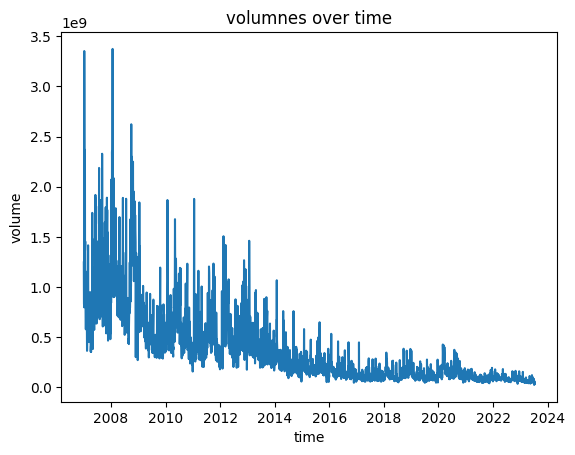

In [92]:
sns.lineplot(x='time', y='volume', data = df)
plt.title("volumnes over time")
plt.show()

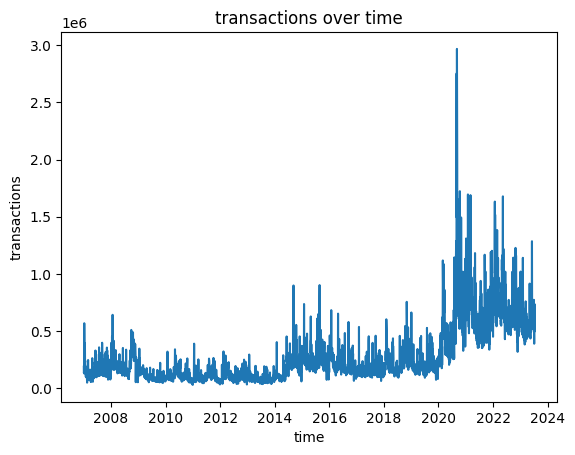

In [91]:
sns.lineplot(x='time', y='transactions', data = df)
plt.title("transactions over time")
plt.show()

In [95]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.



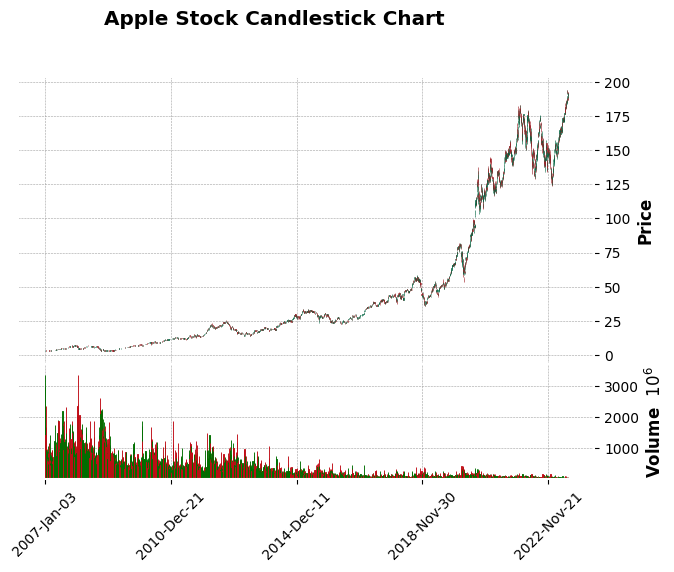

In [96]:
import pandas as pd
import mplfinance as mpf

# Assuming df is your DataFrame containing the stock data
# Convert the 'time' column to datetime if it's not already in datetime format
df['time'] = pd.to_datetime(df['time'], unit='s')

# Set the 'time' column as the index
df.set_index('time', inplace=True)

# Plot the candlestick chart
mpf.plot(df, type='candle', volume=True, style='charles', title='Apple Stock Candlestick Chart')


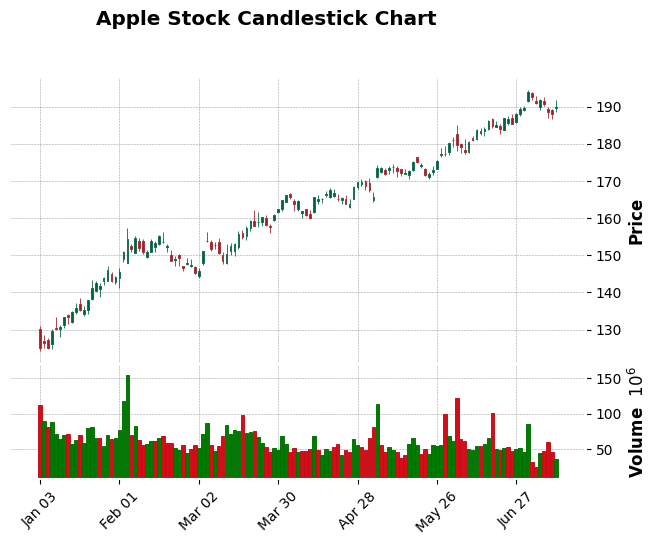

In [156]:
df_23 = df[df["time"].dt.year == 2023]


# Set the 'time' column as the index
df_23.set_index('time', inplace=True)

# Plot the candlestick chart
mpf.plot(df_23, type='candle', volume=True, style='charles', title='Apple Stock Candlestick Chart')


In [103]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create candlestick trace
candlestick = go.Candlestick(x=df['time'],
                             open=df['open'],
                             high=df['high'],
                             low=df['low'],
                             close=df['close'],
                             name='Candlestick')

# Create figure with subplot
fig = make_subplots(rows=1, cols=1)

# Add candlestick trace to the figure
fig.add_trace(candlestick)

# Update layout
fig.update_layout(title='Apple Stock Candlestick Chart',
                  xaxis_title='time',
                  yaxis_title='open')

# Show the plot
fig.show()


In [166]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create candlestick trace
candlestick = go.Candlestick(x=df_19['time'],
                             open=df_19['open'],
                             high=df_19['high'],
                             low=df_19['low'],
                             close=df_19['close'],
                             name='Candlestick')

# Create figure with subplot
fig = make_subplots(rows=1, cols=1)

# Add candlestick trace to the figure
fig.add_trace(candlestick)

# Update layout
fig.update_layout(title='Apple Stock Candlestick Chart',
                  xaxis_title='time',
                  yaxis_title='open')

# Show the plot
fig.show()

In [114]:
df_jun = df_19[df_19["time"].dt.month == 6]

In [115]:

# Create candlestick trace
candlestick = go.Candlestick(x=df_jun['time'],
                             open=df_jun['open'],
                             high=df_jun['high'],
                             low=df_jun['low'],
                             close=df_jun['close'],
                             name='Candlestick')

# Create figure with subplot
fig = make_subplots(rows=1, cols=1)

# Add candlestick trace to the figure
fig.add_trace(candlestick)

# Update layout
fig.update_layout(title='Apple Stock Candlestick Chart',
                  xaxis_title='time',
                  yaxis_title='open')

# Show the plot
fig.show()

In [146]:
columns = df.columns.to_list()
columns.remove('time')
for col in columns:
  print(col)
  print(describe(df[col]))


volume
DescribeResult(nobs=4159, minmax=(24222338.0, 3373042176.0), mean=366292450.04688627, variance=1.3874081481307606e+17, skewness=2.1518270531378234, kurtosis=6.549674704561561)
vwap
DescribeResult(nobs=4159, minmax=(2.841, 193.102), mean=46.39138203895167, variance=2527.832772746457, skewness=1.3893379059906736, kurtosis=0.560693349789092)
open
DescribeResult(nobs=4159, minmax=(2.8354, 193.78), mean=46.362787713392635, variance=2523.6147763984272, skewness=1.3893594173276345, kurtosis=0.5600455558846966)
close
DescribeResult(nobs=4159, minmax=(2.7929, 193.97), mean=46.39605770617938, variance=2529.434370394273, skewness=1.3897338355214903, kurtosis=0.5619765413807136)
high
DescribeResult(nobs=4159, minmax=(2.9286, 194.48), mean=46.88112704977158, variance=2585.0995191309635, skewness=1.3887909650457573, kurtosis=0.5529224718174808)
low
DescribeResult(nobs=4159, minmax=(2.7929, 191.76), mean=45.865790310170716, variance=2468.112709558879, skewness=1.3904099332903086, kurtosis=0.57

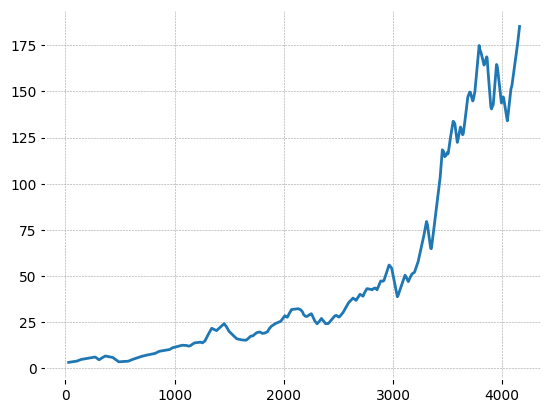

In [151]:
#Analyze closing prices with a moving average.
# Calculate the 50-day simple moving average
sma_7 = df['close'].rolling(window=30).mean()

plt.plot(sma_7)

In [206]:

# Calculate the rolling average
sma = df['close'].rolling(window=30).mean()
# Create a Plotly trace for the rolling average
trace_sma = go.Scatter(x=sma.index, y=sma.values, mode='lines', name='30-Day SMA')

# Create a Plotly figure
fig = go.Figure()

# Add the trace to the figure
fig.add_trace(trace_sma)

# Update layout
fig.update_layout(title='30-Day Simple Moving Average (SMA)',
                  xaxis_title='Date',
                  yaxis_title='Price')

# Show the plot
fig.show()


In [179]:
group1 = df["close"][df["time"].dt.year == 2022]
group2 = df["close"][df["time"].dt.year == 2023]

In [196]:
df.columns

Index(['volume', 'vwap', 'open', 'close', 'high', 'low', 'time',
       'transactions'],
      dtype='object')

In [198]:
df

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,2007-01-03 05:00:00,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,2007-01-04 05:00:00,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,2007-01-05 05:00:00,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,2007-01-08 05:00:00,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,2007-01-09 05:00:00,569578
...,...,...,...,...,...,...,...,...
4154,4.515552e+07,190.8214,189.8400,191.8100,192.0200,189.2000,2023-07-06 04:00:00,562755
4155,4.675750e+07,191.4218,191.4100,190.6800,192.6700,190.2400,2023-07-07 04:00:00,538826
4156,5.991216e+07,188.3628,189.2600,188.6100,189.9900,187.0350,2023-07-10 04:00:00,736912
4157,4.663812e+07,187.8219,189.1600,188.0800,189.3000,186.6000,2023-07-11 04:00:00,577717


In [199]:
df["year"] = df["time"].dt.year

In [200]:
df["month"] = df["time"].dt.month


In [201]:
df.head()

,volume,vwap,open,close,high,low,time,transactions,year,month
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,2007-01-03 05:00:00,189737,2007,1
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,2007-01-04 05:00:00,136333,2007,1
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,2007-01-05 05:00:00,141050,2007,1
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,2007-01-08 05:00:00,130547,2007,1
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,2007-01-09 05:00:00,569578,2007,1


In [241]:
#Execute a t-test to compare average closing prices across different years
for year in df["year"].unique():
  group1 = df["close"][df["time"].dt.year == year]
  group2 = df["close"][df["time"].dt.year == year+1]
  t_statistic, p_value = stats.ttest_ind(group1, group2)
  print("group1:", year)
  print("group2:", year+1)
  print("T-statistic:", t_statistic)
  print("P-value:", p_value)

group1: 2007
group2: 2008
T-statistic: -4.461286441822355
P-value: 1.0063748079201263e-05
group1: 2008
group2: 2009
T-statistic: -1.4710316317033987
P-value: 0.1419078573137796
group1: 2009
group2: 2010
T-statistic: -32.7824589293039
P-value: 7.525529097558201e-127
group1: 2010
group2: 2011
T-statistic: -36.2294666293064
P-value: 3.511887723714795e-142
group1: 2011
group2: 2012
T-statistic: -46.845318433200624
P-value: 5.2506988504694954e-185
group1: 2012
group2: 2013
T-statistic: 20.335857408243225
P-value: 1.9189637690998654e-67
group1: 2013
group2: 2014
T-statistic: -26.489329790084508
P-value: 2.1671446598737728e-97
group1: 2014
group2: 2015
T-statistic: -28.591096587791416
P-value: 2.054704645065778e-107
group1: 2015
group2: 2016
T-statistic: 22.613444254759397
P-value: 1.343170559155719e-78
group1: 2016
group2: 2017
T-statistic: -44.19372610395417
P-value: 5.535462006876177e-175
group1: 2017
group2: 2018
T-statistic: -24.15196563545234
P-value: 5.488982508551165e-86
group1: 2018


<ipython-input-241-76918ca2cf90>:4: DeprecationWarning:

Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



In [220]:
#Examine daily returns’ distribution and test for normality using SciPy
df["returns"] = ((df["close"] - df["close"].shift(1))/df["close"].shift(1))*100

In [221]:
df.head()

,volume,vwap,open,close,high,low,time,transactions,year,month,returns
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,2007-01-03 05:00:00,189737,2007,1,NaN
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,2007-01-04 05:00:00,136333,2007,1,2.218584
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,2007-01-05 05:00:00,141050,2007,1,-0.712581
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,2007-01-08 05:00:00,130547,2007,1,0.493827
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,2007-01-09 05:00:00,569578,2007,1,8.307944


Text(0.5, 1.0, 'Gaussian Distribution')

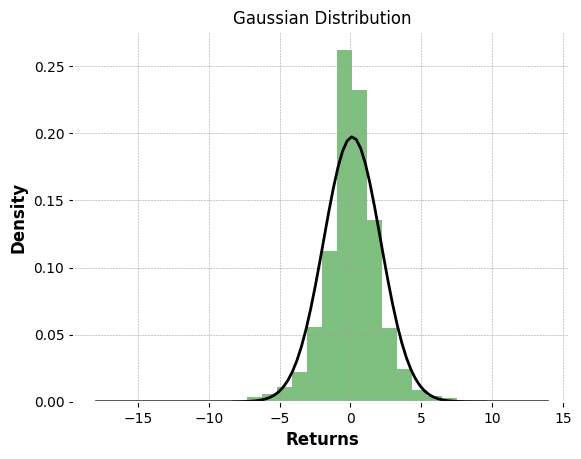

In [231]:
xmin=df["returns"].max()
xmax=df["returns"].min()
mu =df["returns"].mean()
sigma = df["returns"].std()
plt.hist(df["returns"], bins=30, density=True, alpha=0.5, color='g')
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Returns')
plt.ylabel('Density')
plt.title('Gaussian Distribution')